"""

Description to accompany the movement data analysis in `scripts/movement.py`. 

Written by Ed Oughton.

March 2020. 

"""
Which geographic areas should I target for 'WarDriving'?

We specifically want to have an understanding of busy areas across both daytime and nighttime periods. Without moving to full dynamic transport modeling, we can derive insight by estimating:

- The residential population - so where people generally live and usually spend evenings and weekends.
- The local labour workforce - so where people are employed and generally spend the working day. 

Using these metrics, we can then estimate various indicators which provide insight into human movement, and how this may affect both WiFi and cellular demand. These metrics include:

- Population 
    The resident (nighttime) population in a local area. 
- Population density (persons per km^2)
    The density of the resident (nighttime) population in a local area. 
- Area (km^2)
    The surface area of a local area. 
- Employment density (employment per km^2)
    The density of the local (daytime) labour market in a local area. 
- Daytime percentage change (%)
    The difference between the daytime and nightime population. A negative value means people leave the area in the daytime to work in 
    other locations, whereas a positive number means people move into the local area for employment during the day. 
- Maximum people
    The summation of both daytime and nighttime population. This should be treated as an upper bound of the potential users in an 
    area. 
- Maximum people density (people per km^2)
    The maximum density of people based on the summation of both daytime and nighttime population. This should be treated as an upper 
    bound of the potential user density in an area.
- Maximum increase (%)
    The maximum change between the nighttime population and the summation of the daytime and nighttime population. 

I will now step through the results generated in this analysis. 

In [15]:
import pandas as pd
import os

#let's first import the movement data generated by scripts/movement.py
data = pd.read_csv(os.path.join('..', 'results', 'pcd_sector_movement.csv'))

data.head()

,year,lad,id,population,StrSect,employment,area_km2,pop_density_km2,emp_density_km2,daytime_change_perc,max_persons,max_persons_density,max_increase_perc,geotype
0,2020,E06000001,TS233,11481,TS233,2975,7.786260,1474.520425,382.083291,-74.087623,14456,1856.603717,25.912377,Suburban
1,2020,E06000001,TS240,6246,TS240,5950,3.515636,1776.634192,1692.438911,-4.739033,12196,3469.073103,95.260967,Suburban
2,2020,E06000001,TS247,1988,TS247,5500,0.807021,2463.380622,6815.187837,176.659960,7488,9278.568459,276.659960,Suburban
3,2020,E06000001,TS248,5865,TS248,875,1.304617,4495.570792,670.694705,-85.080989,6740,5166.265497,14.919011,Suburban
4,2020,E06000001,TS249,6894,TS249,2750,3.182385,2166.299965,864.131840,-60.110241,9644,3030.431805,39.889759,Suburban


Firstly, we want to understand the distribution of the population across postcode sectors and local authorities

In [2]:
print('')
print('We have {} postcode sectors within a total of {} Local Authority Districts.'.format(len(data.id.unique()), len(data.lad.unique())))
print('')
print('The population totals {} million and the geographic area is {} km^2.'.format(round(data.population.sum()/1e6), int(round(data.area_km2.sum()))))
print('')
print('This data covers England, Scotland and Wales, but excludes Northern Ireland.')


We have 9212 postcode sectors within a total of 378 Local Authority Districts.

The population totals 65.0 million and the geographic area is 225972 km^2.

This data covers England, Scotland and Wales, but excludes Northern Ireland.


We now want to understand some basic statistics for the areas being analysed. Below, the population distribution is visualized. 
We can see that most postcode sectors have an average population of ~7.5k, with few postcode sectors having a population 
exceeding 15k.

In [3]:
import matplotlib.pyplot as plt
plt.figure()
data['population'].plot.hist(alpha=0.5, bins=1000)
n = len(data)
plt.title('Population (n={})'.format(n))
plt.legend('')
plt.xlim(0)

(0, 38901.45)

In terms of population density, we can see that most postcode sectors have a pop density below 5k persons per square kilometer.
Some have very high pop density, going all the way up to 40k per km^2. Often these are outliers or statistical artifacts. For 
example, areas of large towerblocks often get their own postcode which can lead to unrealistically high population density. 

(0, 44668.87364325279)

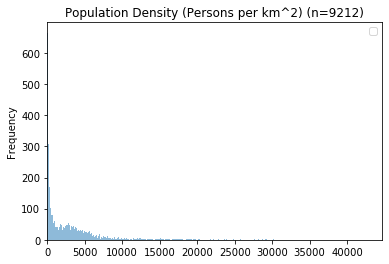

In [4]:
plt.figure()
data['pop_density_km2'].plot.hist(alpha=0.5, bins=1000)
n = len(data)
plt.title('Population Density (Persons per km^2) (n={})'.format(n))
plt.legend('')
plt.xlim(0)
 

In terms of area, many postcodes have a very small area <10km^2. Only a few go above 50km^2, with Inverness (Soctland) 
producing many in the upper end of the distribution. 

(0, 313.0877576724364)

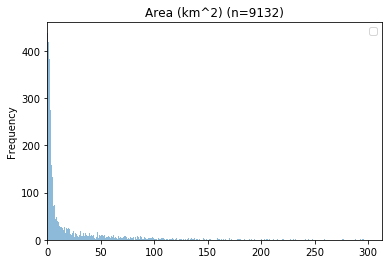

In [5]:
plt.figure()
subset = data.loc[data['area_km2'] <= 300]
n = len(subset)
subset['area_km2'].plot.hist(alpha=0.5, bins=1000)
plt.title('Area (km^2) (n={})'.format(n))
plt.legend('')
plt.xlim(0)
 

Employment density is quite mixed, with many areas having very low density. However, some areas can have up to 5000 workers 
per square kilometer, with London postcode sectors dominating the top end of the distribution (e.g. The City, Canary Wharf etc.). 

(0, 5240.546680437644)

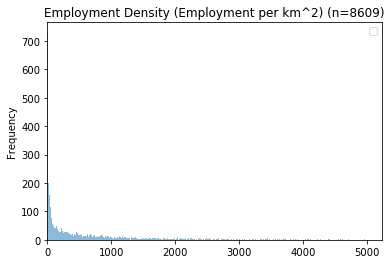

In [6]:
plt.figure()
subset = data.loc[data['emp_density_km2'] <= 5000]
subset['emp_density_km2'].plot.hist(alpha=0.5, bins=1000)
n = len(subset)
plt.title('Employment Density (Employment per km^2) (n={})'.format(n))
plt.legend('')
plt.xlim(0)

Having provided the basic metrics relating to nighttime population, daytime employment, area and density, we can now get into metrics
representing user movement. 

The daytime change represents the percentage difference between the nighttime population (baseline) and the level of daytime 
employment. 

What is interesting about the distribution below is that the large majority of postcode sectors lose population in the day as 
people travel to their place of work. Whilst this may seem obvious, the information below is very useful because here we 
have quantifiable evidence to show the potential extremes of this change. Many existing models do not account for population 
movement, using only population as the key input factor when dimensioning digital networks. Evidently, this grossely underestimates
the daytime population in employment centers. 

The distribution suggests the large majority of areas lose over 75% of their nighttime population, with only a very small number 
of areas increasing during the day. Commuters move from low density suburban and rural residential areas in the morning to high 
density urban locations to work in the day.    

(-100, 100)

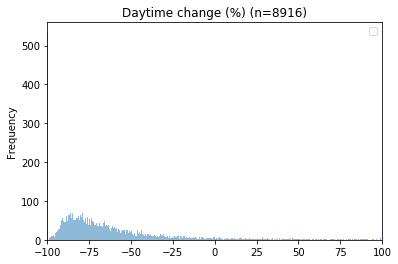

In [7]:
plt.figure()
subset = data.loc[data['daytime_change_perc'] <= 200]
subset['daytime_change_perc'].plot.hist(alpha=0.5, bins=1000)
n = len(subset)
plt.title('Daytime change (%) (n={})'.format(n))
plt.legend('')
plt.xlim(-100, 100)

The maximum number of people results from the summation of the daytime and nighttime population, providing an upper bound for the 
number of users. The mean is around 5-10k, but the distribution has a very long tail going all the way up to 336k in the City of 
London. Two other London areas then exceed 100k, and then all other postcodes areas are below 100k. Approximately 500 areas exceed
20k, meaning ~8600 remaining areas are below this threshold. 

(0, 352805.25)

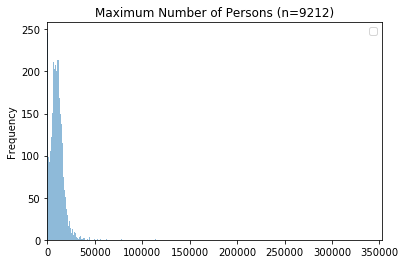

In [8]:
plt.figure()
data['max_persons'].plot.hist(alpha=0.5, bins=1000)
n = len(data)
plt.title('Maximum Number of Persons (n={})'.format(n))
plt.legend('')
plt.xlim(0)

In terms of density, most areas have a maximum density below 10k. 

(0, 20982.70576034405)

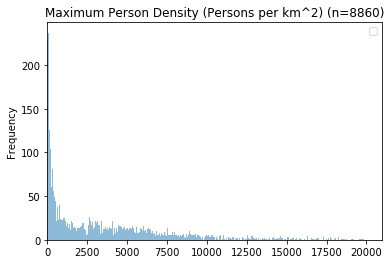

In [9]:
plt.figure()
subset = data.loc[data['max_persons_density'] <= 20000]
subset['max_persons_density'].plot.hist(alpha=0.5, bins=1000)
n = len(subset)
plt.title('Maximum Person Density (Persons per km^2) (n={})'.format(n))
plt.legend('')
plt.xlim(0)

When using the nightime population as the baseline, the maximum increase most areas might experience when combining both daytime and 
nighttime is below 200%.

(0, 1046.195652173913)

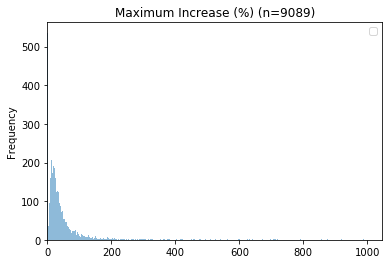

In [12]:
plt.figure()
subset = data.loc[data['max_increase_perc'] <= 1000]
subset['max_increase_perc'].plot.hist(alpha=0.5, bins=1000)
n = len(subset)
plt.title('Maximum Increase (%) (n={})'.format(n))
plt.legend('')
plt.xlim(0)

The pairplot below shows the correlations between the metrics outlined. The area, and population and employment density metrics
show expected correlations. As area decreases, density increases and vice versa, etc.. 

The daytime change is interesting as the metric is dominated by two effects. Firstly, very dense urban areas 
with few nighttime residents, but very high daytime employment as people travel into city centers (e.g. City of London). 
Secondly, suburban and rural areas with few nighttime residents, but workers driving to industrial plants, 
distribution centers etc. often on the outskirts of major cities (London, Birmingham etc.).


<Figure size 432x288 with 0 Axes>

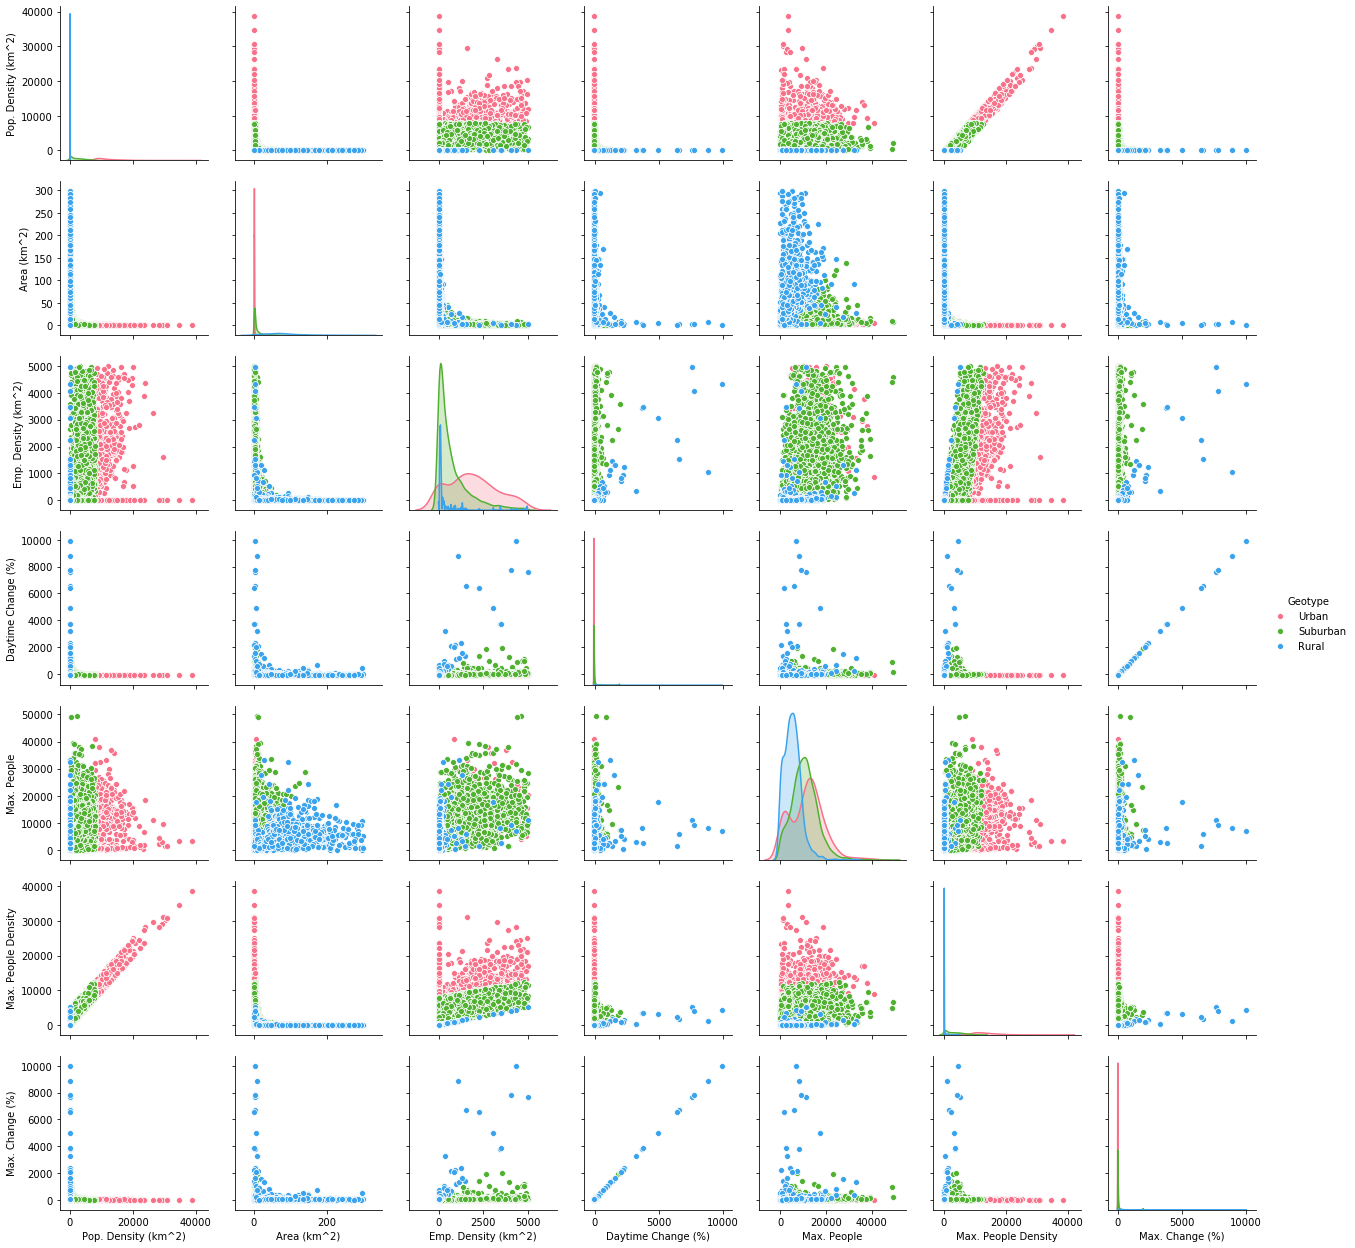

In [16]:
import seaborn as sns

data = data.loc[data['area_km2'] < 300]
data = data.loc[data['emp_density_km2'] < 5000]
data = data.loc[data['daytime_change_perc'] < 10000]

data = data[[
    'pop_density_km2', 'area_km2',
    'emp_density_km2', 'daytime_change_perc',
    'max_persons', 'max_persons_density', 'max_increase_perc',
    'geotype'
]]

data.columns = [
    'Pop. Density (km^2)', 'Area (km^2)',
    'Emp. Density (km^2)', 'Daytime Change (%)',
    'Max. People', 'Max. People Density', 'Max. Change (%)',
    'Geotype'
]

plt.figure()
sns.pairplot(data, hue = 'Geotype', hue_order = ['Urban', 'Suburban', 'Rural'], diag_kind = "kde", kind = "scatter", palette = 'husl')
